# Chargement des trajectoires d’émissions  de CO2, CH4 et N2O (quantités physiques)

In [1]:
# Import required Python modules
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Chargement trajectoire CO2

Chargement en mémoire de la trajectoire d'émissions de CO2 (données en PgC/year).  
*Données disponibles [ici](https://github.com/milinc/serendipias/blob/master/methane/data/AR5_WGI_AII2.1.c.csv)*  
*Source complète: © RCP Database (Version 2.0.5): [http://www.iiasa.ac.at/web-apps/tnt/RcpDb](http://www.iiasa.ac.at/web-apps/tnt/RcpDb)*

In [2]:
df_CO2 = pd.read_csv("data/AR5_WGI_AII2.1.c.csv")

Conversion des données source en MtCO2/year

In [3]:
df_CO2.iloc[:,1:] = df_CO2.iloc[:,1:].mul(44/12*1000)

Visualisation des données

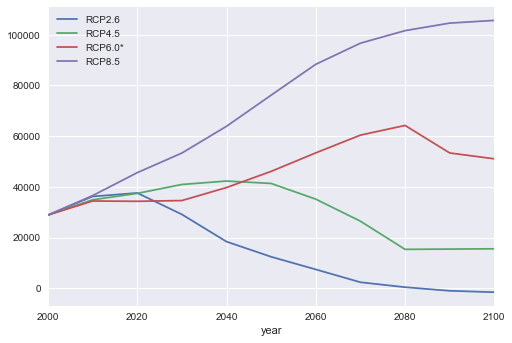

In [4]:
df_CO2.plot(x='year')

### Chargement trajectoire CH4    

Chargement en mémoire de la trajectoire d'émissions de CH4 (données en MtCH4/year)  
*Données disponibles [ici](https://github.com/milinc/serendipias/blob/master/methane/data/AR5_WGI_AII2.2.csv)*  
*Source complète: © RCP Database (Version 2.0.5): [http://www.iiasa.ac.at/web-apps/tnt/RcpDb](http://www.iiasa.ac.at/web-apps/tnt/RcpDb)*

In [5]:
df_CH4 = pd.read_csv("data/AR5_WGI_AII2.2.csv")

Visualisation des données

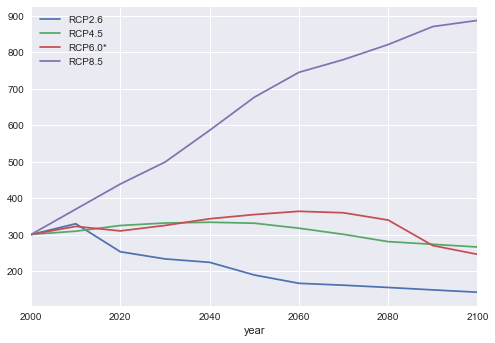

In [6]:
df_CH4.plot(x='year')

### Chargement trajectoire N2O

Chargement en mémoire de la trajectoire d'émissions de N2O (données en MtN2O/year)  
*Données disponibles [ici](https://github.com/milinc/serendipias/blob/master/methane/data/AR5_WGI_AII2.3.csv)*  
*Source complète: © RCP Database (Version 2.0.5): [http://www.iiasa.ac.at/web-apps/tnt/RcpDb](http://www.iiasa.ac.at/web-apps/tnt/RcpDb)*

In [7]:
df_N2O = pd.read_csv("data/AR5_WGI_AII2.3.csv")

Visualisation des données

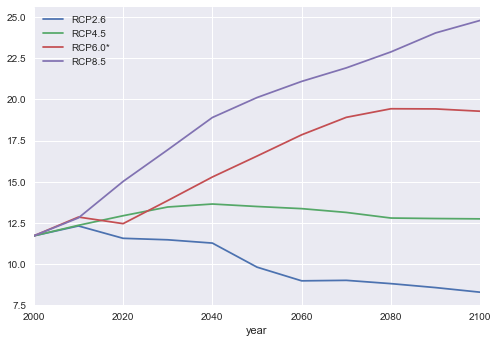

In [8]:
df_N2O.plot(x='year')

# Calcul des valeurs des ces émissions en teqCO2

### Convertion des émissions de CH4 en teqCO2

Chargement de l'abaque PRG_CH4 au pas de 10 ans  
*Données abaque disponible [ici](https://github.com/milinc/serendipias/blob/master/methane/data/GWP_CH4_abacus.csv)*

In [9]:
abaque_PRG_CH4 = pd.read_csv("data/GWP_CH4_abacus.csv")

Conversion des données à partir de l'abaque (horizon 100 ans)

In [10]:
df_CH4_teqCO2 = df_CH4.copy()
for i in range(11):
    df_CH4_teqCO2.iloc[i,1:] = df_CH4_teqCO2.iloc[i,1:] * abaque_PRG_CH4.iloc[i,11]

Visualisation des données

In [11]:
df_CH4_teqCO2.round(1)

,year,RCP2.6,RCP4.5,RCP6.0*,RCP8.5
0,2000,8554.0,8565.7,8561.7,8562.5
1,2010,10191.7,9559.2,9965.9,11422.8
2,2020,8577.7,11016.8,10513.7,14876.3
3,2030,8775.1,12477.2,12226.0,18760.1
4,2040,9476.0,14126.1,14529.6,24789.9
5,2050,9161.6,16035.9,17183.9,32756.6
6,2060,9438.3,18007.4,20634.8,42250.0
7,2070,10984.5,20481.1,24511.2,53123.4
8,2080,13010.4,23558.3,28518.4,68911.3
9,2090,15466.4,28490.4,28134.0,90728.0


### Convertion des émissions de N2O en teqCO2

Nous considèrerons un PRG constant à 265 sur la période

In [12]:
df_N2O_teqCO2 = df_N2O.copy()
df_N2O_teqCO2.iloc[:,1:] = df_N2O_teqCO2.iloc[:,1:].mul(265)

Visualisation des données

In [13]:
df_N2O_teqCO2.round(1)

,year,RCP2.6,RCP4.5,RCP6.0*,RCP8.5
0,2000,3105.8,3105.8,3105.8,3105.8
1,2010,3264.8,3275.4,3407.9,3394.6
2,2020,3066.0,3429.1,3301.9,3980.3
3,2030,3042.2,3569.6,3672.9,4489.1
4,2040,2989.2,3617.2,4051.8,5008.5
5,2050,2602.3,3577.5,4388.4,5329.2
6,2060,2382.4,3543.0,4730.2,5588.8
7,2070,2390.3,3482.1,5011.2,5806.2
8,2080,2337.3,3392.0,5149.0,6063.2
9,2090,2273.7,3384.0,5146.3,6368.0


# Calcul des hausses de températures associées à chaque scénario

In [14]:
for i in range(1, len(df_CO2.columns)):
    total_CO2 = (df_CO2.iloc[0,i]*5 + df_CO2.iloc[1:10,i].sum()*10 + df_CO2.iloc[10,i]*5)/1000
    total_CH4 = (df_CH4_teqCO2.iloc[0,i]*5 + df_CH4_teqCO2.iloc[1:10,i].sum()*10 + df_CH4_teqCO2.iloc[10,i]*5)/1000
    total_N2O = (df_N2O_teqCO2.iloc[0,i]*5 + df_N2O_teqCO2.iloc[1:10,i].sum()*10 + df_N2O_teqCO2.iloc[10,i]*5)/1000
    
    total_GHG = total_CO2 + total_CH4 + total_N2O
    
    print("La hausse de température à l'horizon 2100 \
pour le scenario {0} est estimée à {1:.2f}°C".format(df_CO2.columns[i], 0.444 * total_GHG / 1000))

La hausse de température à l'horizon 2100 pour le scenario RCP2.6 est estimée à 1.29°C
La hausse de température à l'horizon 2100 pour le scenario RCP4.5 est estimée à 2.31°C
La hausse de température à l'horizon 2100 pour le scenario RCP6.0* est estimée à 3.06°C
La hausse de température à l'horizon 2100 pour le scenario RCP8.5 est estimée à 5.33°C
